In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

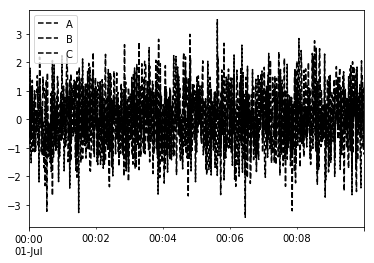

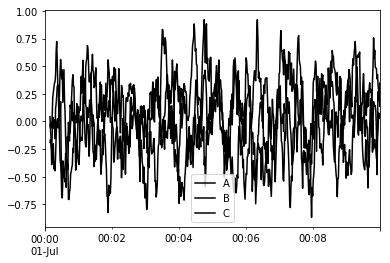

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)

#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.032666,-0.814399,0.286675
2016-07-01 00:00:02,0.697917,-0.062713,-0.052021
2016-07-01 00:00:03,0.280362,-0.086530,-0.354356
2016-07-01 00:00:04,0.018413,-0.245830,-0.654873
2016-07-01 00:00:05,-0.075083,0.067801,-0.234211
2016-07-01 00:00:06,0.221500,0.069507,0.045006
2016-07-01 00:00:07,-0.034877,0.078879,-0.083859
2016-07-01 00:00:08,-0.039820,-0.098686,-0.158863
2016-07-01 00:00:09,-0.006018,0.024063,-0.221719


In [19]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [20]:
df.head()

,A,B,C,D
2016-06-06,0.676188,0.234849,0.099136,-0.771908
2016-06-07,-0.285574,-0.602704,-0.537244,-1.625401
2016-06-08,0.752585,0.402137,0.191279,1.250844
2016-06-09,-1.507427,-0.584827,0.494717,1.232568
2016-06-10,0.491863,-1.289894,-1.849424,-0.118861


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000E23EEFE978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000E23F6A9748>], dtype=object)

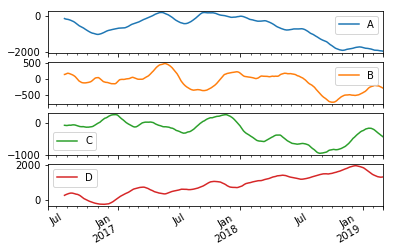

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.360975,1.176375,0.592258,0.693697


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.184854,-0.497483,-0.963597,0.114656
2016-06-08,-0.898335,-0.984693,-1.315792,0.166962
2016-06-09,-1.537127,-1.322534,-1.603370,0.075417
2016-06-10,-1.969504,-1.550163,-1.640987,0.154098


##### Will an expanding window provide a more or less stable statistic than a rolling statistic? MORE STABLE THROUGH TIME

#### When might one vs. the other be appropriate?

For example,if you are adding new user/member, but also the old users are still relevant and active, expanding window is  appropraiate.

if a user/member is giving a new data and more and more but also his/her old data is all so relevant, expanding window is appropriate


#### EWMA
#### Why use EWMA?

It is so common. It tends to give you mean, variance... especially if you think the center of window is so relevant 
and not wanting to see things outside of the center of the window.

In [38]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate
dfa = pd.DataFrame(np.random.randn(1000, 2),index=pd.date_range('1/1/2000', periods=1000),columns=['A', 'B'])
A = dfa.rolling(window=60,min_periods=1)
A.aggregate(np.sum)

,A,B
2000-01-01,-0.772298,-0.126664
2000-01-02,-1.156615,-2.041433
2000-01-03,-0.043701,-1.736555
2000-01-04,0.447630,-1.730200
2000-01-05,1.680084,-1.271655
2000-01-06,1.442221,-1.643798
2000-01-07,1.409171,-3.450244
2000-01-08,1.689361,-3.028578
2000-01-09,0.613418,-4.783590
2000-01-10,-0.827918,-4.410287


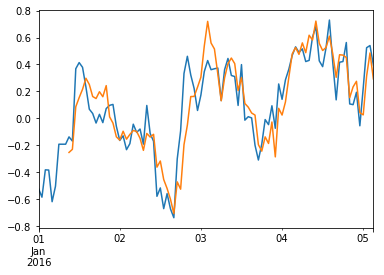

In [36]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

ts =pd.Series(np.random.randn(100), index = pd.date_range('2016/01/01',periods=100,freq='H'))
ts.ewm(span=10,freq='H',min_periods = 0, adjust = True).mean().plot()
ts.rolling(window=10).mean().plot()